# Persiapan Dataset

## 1. Import Library dan Baca Dataset

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical


In [84]:
df = pd.read_csv("ndtv_data_final.csv")

Pada tahap ini, kita mengimpor semua library yang diperlukan untuk



## 2. Buat Fitur Tambahan dan Normalisasi

In [85]:
# Buat fitur PPI
df["PPI"] = np.sqrt(df["Resolution x"]**2 + df["Resolution y"]**2) / df["Screen size (inches)"]

# Normalisasi semua kolom numerik
scaler = StandardScaler()
df_scaled = df.copy()
num_cols = df.select_dtypes(include="number").columns
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])




*   Fitur PPI (Pixels Per Inch) dibuat untuk memberi informasi tambahan tentang kepadatan layar, yang sering berhubungan dengan harga.
*   Normalisasi dengan StandardScaler membuat semua fitur berada pada skala yang sama. Ini sangat penting agar training lebih cepat dan stabil.



In [86]:
# Tentukan median harga
median_price = df["Price"].median()

# Label: 0 = harga rendah, 1 = harga tinggi
df_scaled["Price_Class"] = (df["Price"] > median_price).astype(int)

# Pilih fitur relevan
X = df_scaled[[
    "RAM (MB)",
    "Internal storage (GB)",
    "Battery capacity (mAh)",
    "PPI",
    "Resolution x",
    "Resolution y"
]]

# Ubah label ke one-hot encoding
y = to_categorical(df_scaled["Price_Class"])


In [88]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=df_scaled["Price_Class"]
)


In [89]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])


In [90]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=df_encoded["Price_Class"]
)


In [91]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # binary classification
])


In [92]:
optimizer = Adam(learning_rate=0.0005)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [93]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6439 - loss: 0.5976 - val_accuracy: 0.8088 - val_loss: 0.4208
Epoch 2/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7741 - loss: 0.4546 - val_accuracy: 0.8088 - val_loss: 0.4158
Epoch 3/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7754 - loss: 0.4676 - val_accuracy: 0.8088 - val_loss: 0.4104
Epoch 4/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7657 - loss: 0.4605 - val_accuracy: 0.8088 - val_loss: 0.4095
Epoch 5/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7874 - loss: 0.4540 - val_accuracy: 0.8162 - val_loss: 0.4101
Epoch 6/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8084 - loss: 0.4383 - val_accuracy: 0.8162 - val_loss: 0.4062
Epoch 7/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7640 - loss: 0.4868 - val_accuracy: 0.8088 - val_loss: 0.4068
Epoch 8/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7701 - loss: 0.4628 - val_accuracy: 0.8199 - 

In [94]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Akurasi Model pada Data Test: {acc*100:.2f}%")


Akurasi Model pada Data Test: 81.99%


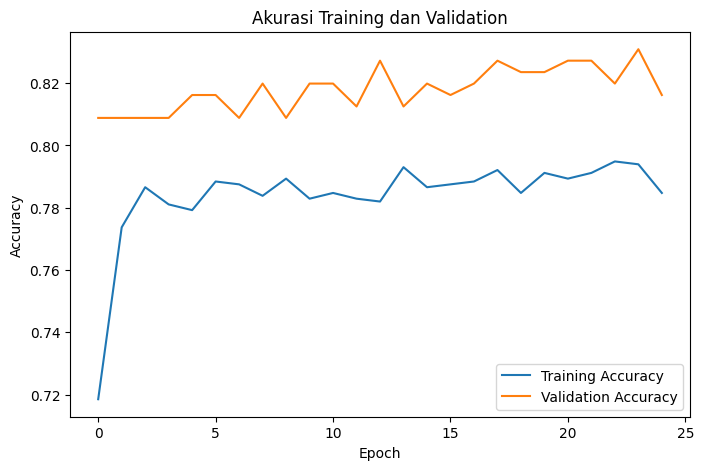

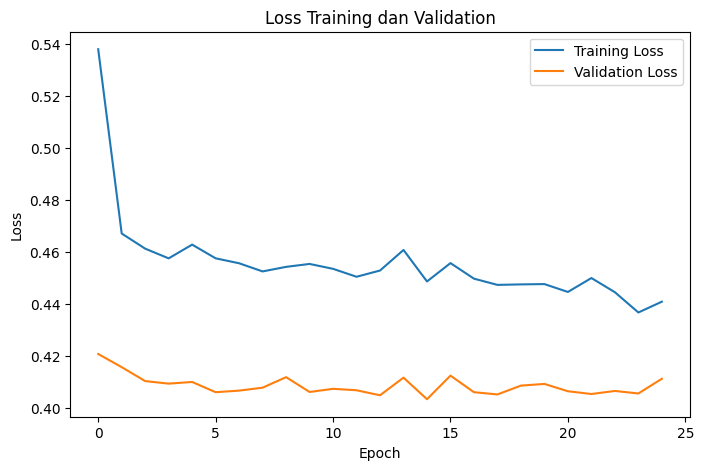

In [95]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Akurasi Training dan Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Training dan Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
